In [31]:
from pathlib import Path
import sys
import os
import PIL.Image
import json
from src import *

ROOT_PATH = Path().resolve().parent
sys.path.insert(0, str(ROOT_PATH))

# Generate captions from renders
This notebooks employs SOTA vision transformers (ViTs) to generate captions for the renders.

| Parameter        | Description                                                                                                                                               | Default |
| ---------------- | --------------------------------------------------------------------------------------------------------------------------------------------------------- | ------- |
| _Deterministic_|&nbsp;|
| `max_new_tokens` | Maximum number of tokens to generate beyond the prompt. Once this cap is reached, generation stops even without an end-of-sequence token.                 | `None`  |
| `num_beams`      | Number of beams for beam search. Higher values explore more candidate sequences (better quality but slower/more memory).                                  | `1`     |
| `length_penalty` | Exponent applied to sequence length during beam scoring. <1 favors longer outputs; >1 favors shorter ones.                                                | `1.0`   |
| `early_stopping` | If `True`, beam search stops when all beams hit end-of-sequence; if `False`, continues until `max_new_tokens` or best beam ends, rarely yielding a better overall score.                          | `False` |
|_Stochastic_|&nbsp;|
| `do_sample`      | If `True`, uses probabilistic sampling instead of deterministic (greedy or beam) decoding—introduces randomness for more varied outputs.                  | `False` |
| `temperature`    | Divides logits before softmax to adjust distribution sharpness. <1 makes choices more conservative; >1 makes them more random (only if `do_sample=True`). | `1.0`   |
| `top_p`          | Nucleus sampling threshold: keeps the smallest token set whose cumulative probability ≥ `top_p`, then samples from it. (Only if `do_sample=True`.)        | `1.0`   |


In [37]:
paths = list((ROOT_PATH / 'data/dataset/objaverse/render').glob("*.jpg"))
captions = json.load(open(ROOT_PATH / 'data/dataset/objaverse/caption/captions.json'))
captions

{'3856247fd4cf4122998e380673dba1de': '3d model of a wooden pillar',
 'dd5f3ffacccc4e22970e4cf7c79b8471': 'a small wooden house with a red roof and shutters',
 '67a7bfd33fd04a7d91c127ca468bf047': 'ramen bowl - ramen bowl royalty-free 3d model - preview no',
 'f277038bcc1d446fb33a9730f5ba2467': '3d render of a blue square on a white background',
 '2068678d6c904cd5b0770f3bd9d5fe44': 'a hammer and a screwdriver',
 '112e236359df4e00ba656f9274b86892': '3d model of a lamp in the style of art nouveau'}

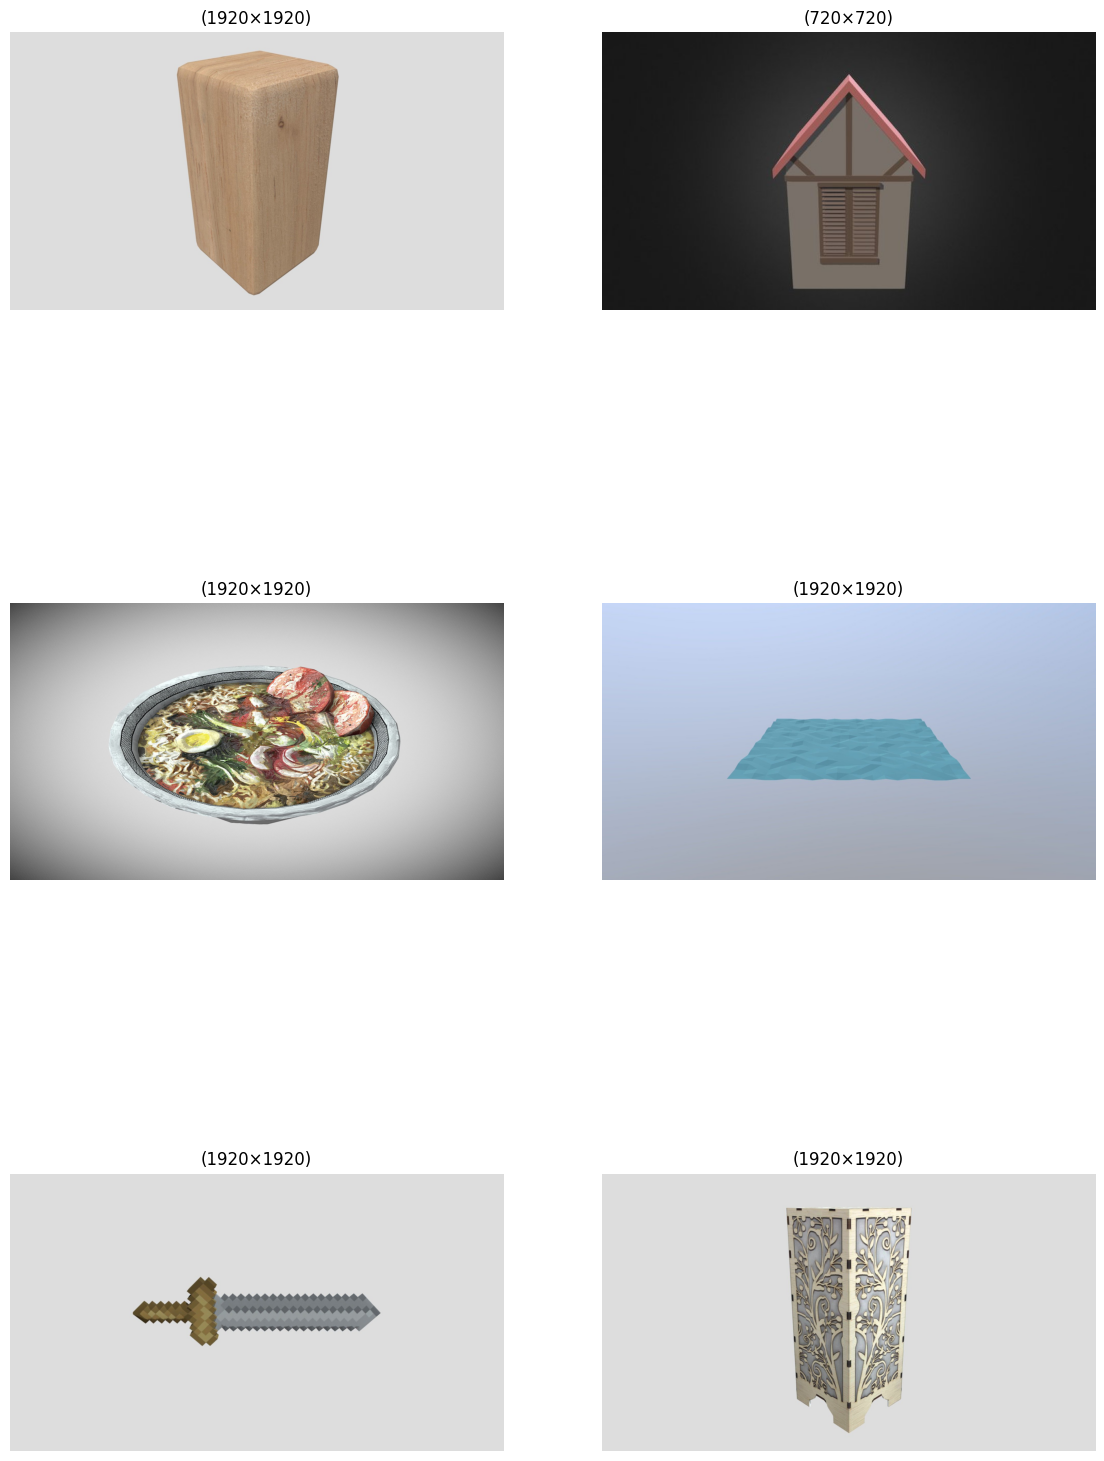

{'3856247fd4cf4122998e380673dba1de': '3d render of a wooden cube on a grey background',
 'dd5f3ffacccc4e22970e4cf7c79b8471': '3d model of a small house with a roof and shutters',
 '67a7bfd33fd04a7d91c127ca468bf047': 'ramen bowl - ramen bowl 3d model - preview no 1',
 'f277038bcc1d446fb33a9730f5ba2467': '3d render of a small square of water on a blue background',
 '2068678d6c904cd5b0770f3bd9d5fe44': 'the overall shape of this 3d render is a long, slender, and angular piece of metal',
 '112e236359df4e00ba656f9274b86892': '3d model of a lamp in the style of art nouveau'}

In [33]:
plot_images([PIL.Image.open(x) for x in paths[:6]], cols=2, size=7)